<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html model.do.txt  -->

## Level crossing and entanglement in a simple  solvable model

In order to study the importance of intruder states, we let
our hamiltonian depend linearly on a strength parameter $\lambda$

$$
H=H_0+\lambda H_1,
$$

with $\lambda \in [0,1]$, where the limits $\lambda=0$ and $\lambda=1$ represent the 
non-interacting (or unperturbed) and fully interacting system, respectively.
The model is an eigenvalue
problem with only two available states, which we label
$P$ and $Q$. Below we will let 
state $P$ represent the model-space
eigenvalue whereas state $Q$ represents 
the eigenvalue of the excluded space.
The unperturbed solutions to this problem are

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
       H_0\Phi_P =\epsilon_P\Phi_P
\label{_auto1} \tag{1}
\end{equation}
$$

and

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
       H_0\Phi_Q =\epsilon_Q\Phi_Q,
\label{_auto2} \tag{2}
\end{equation}
$$

with $\epsilon_P < \epsilon_Q$. We label the off-diagonal
matrix elements $X$, while $X_P=\bra{\Phi_P}H_1\ket{\Phi_P}$ and
$X_Q=\bra{\Phi_Q}H_1\ket{\Phi_Q}$.
The exact eigenvalues problem

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\left(\begin{array}{cc}\epsilon_P+zX_P &zX \\
zX &\epsilon_Q+zX_Q \end{array}\right)
\label{_auto3} \tag{3}
\end{equation}
$$

yields

<!-- Equation labels as ordinary links -->
<div id="eq:exact"></div>

$$
\begin{eqnarray}
\label{eq:exact} \tag{4}
     E(z)=&\frac{1}{2}\left\{\epsilon_P +\epsilon_Q +zX_P
     +zX_Q \pm \left(
     \epsilon_Q -\epsilon_P +zX_Q-zX_P\right) \right. \\ \nonumber
     & \left. \times\sqrt{1+\frac{4z^2X^2}{\left(
     \epsilon_Q -\epsilon_P +zX_Q-zX_P\right)^2}}
     \right\}.
\end{eqnarray}
$$

An RS expansion for the lowest
eigenstate (defining states $P$ and $Q$ as the model and excluded
spaces, respectively) can be obtained by expanding the lowest
eigenvalue as

<!-- Equation labels as ordinary links -->
<div id="eq:modela"></div>

$$
\begin{equation}
      E=\epsilon_P +zX_P+\frac{z^2X^2}{\epsilon_P -\epsilon_Q}+
      \frac{z^3X^2(X_Q-X_P)}{(\epsilon_P -\epsilon_Q)^2}+
      \frac{z^4X^2(X_Q-X_P)^2}{(\epsilon_P -\epsilon_Q)^3}
      -\frac{z^4X^4}{(\epsilon_P -\epsilon_Q)^3}+\dots,
      \label{eq:modela} \tag{5}
\end{equation}
$$

which can be viewed as an effective interaction for state $P$ in which
state $Q$ is taken into account to successive orders of the perturbation.
In this work we choose the parameters $\epsilon_P=0$, $\epsilon_Q=4$,
$X_P=-X_Q=3$ and $X=0.2$. The exact solutions
given by eq.\ ([4](#eq:exact))
are shown in fig.\ 1 as functions of the
strength parameter $\lambda$. Pertinent to our choice of
parameters, is that at $\lambda\geq 2/3$,  the lowest eigenstate is
dominated by $\Phi_Q$ while the upper is $\Phi_P$. At $\lambda=1$ the
$\Phi_P$ mixing of the lowest eigenvalue
is $1\%$ while for $z\leq 2/3$
we have a $\Phi_P$ component of more than $90\%$.
The character of the eigenvectors has therefore been interchanged
when passing $z=2/3$. The value of the parameter $X$ represents the
strength of the coupling between the model space and the excluded space.
Thus, this simple Hamiltonian can be used to find the eigenpairs rather easily. The following code computes and plots the eigenvalues.

nan
0.0007065943536798611
0.0036795666560297037
0.012470088750358552
0.040669157193985554
0.172127862783817
1.0
0.27311611913750444
0.12355940288512157
0.07886218096956155


/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_62840/1590581683.py:29: RuntimeWarning: divide by zero encountered in log2
  print(np.sum(-EigVectors**2*np.log2(EigVectors**2))*0.5)
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_62840/1590581683.py:29: RuntimeWarning: invalid value encountered in multiply
  print(np.sum(-EigVectors**2*np.log2(EigVectors**2))*0.5)


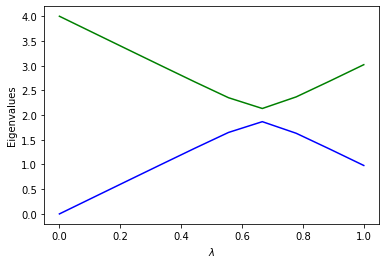

In [56]:
%matplotlib inline

from  matplotlib import pyplot as plt
import numpy as np
dim = 2
#Setting up a tridiagonal matrix and finding eigenvectors and eigenvalues
Hamiltonian = np.zeros((dim,dim))
#number of lambda values
n = 10
lmbd = np.linspace(0.,1.0,n)
e0 = 0.0
e1 = 4.0
X = 0.20
Xp = 3.0
Eigenvalue = np.zeros((dim,n))
for i in range(n): 
    Hamiltonian[0,0] = lmbd[i]*Xp+e0
    Hamiltonian[0,1] = lmbd[i]*X
    Hamiltonian[1,0] = Hamiltonian[0,1]
    Hamiltonian[1,1] = e1+lmbd[i]*(-Xp)
    # diagonalize and obtain eigenvalues, not necessarily sorted
    EigValues, EigVectors = np.linalg.eig(Hamiltonian)
    # sort eigenvectors and eigenvalues
    permute = EigValues.argsort()
    EigValues = EigValues[permute]
    EigVectors = EigVectors[:,permute]
#    print(EigVectors)
    EigVectors = np.linalg.inv(EigVectors)
    print(np.sum(-EigVectors**2*np.log2(EigVectors**2))*0.5)
    Eigenvalue[0,i] = EigValues[0]
    Eigenvalue[1,i] = EigValues[1]
plt.plot(lmbd, Eigenvalue[0,:] ,'b-',lmbd, Eigenvalue[1,:],'g-',)
plt.xlabel('$\lambda$')
plt.ylabel('Eigenvalues')
plt.show()